In [14]:
import pandas as pd
data='https://raw.githubusercontent.com/csbfx/cs133/main/sf_bayarea_house_prices.csv'
df = pd.read_csv(data)
columns_to_drop = ['Address','State','Zip']
df = df.drop(columns=columns_to_drop)
df

,City,Price,Beds,Baths,Home size,Lot size,Latitude,Longitude,SF time,PA time,School score,Commute time
0,Belmont,1459000,3,2.000,1360.000,5001.000,37.517,-122.305,63,33,77.900,33
1,Belmont,1595000,4,2.000,2220.000,3999.000,37.522,-122.294,63,33,77.900,33
2,Belmont,899999,2,1.000,840.000,4234.000,37.520,-122.273,63,33,77.900,33
3,Belmont,1588000,3,2.000,1860.000,5210.000,37.520,-122.309,63,33,77.900,33
4,Belmont,1999000,4,3.500,2900.000,16117.200,37.524,-122.291,63,33,77.900,33
...,...,...,...,...,...,...,...,...,...,...,...,...
7140,Mountain House,603990,5,3.000,2327.000,NaN,37.756,-121.548,120,125,65.300,120
7141,Mountain House,619990,5,4.000,2410.000,NaN,37.756,-121.548,120,125,65.300,120
7142,Mountain House,666340,5,4.000,2486.000,NaN,37.765,-121.538,120,125,65.300,120
7143,Mountain House,659990,5,4.000,2856.000,NaN,37.756,-121.548,120,125,65.300,120


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7145 entries, 0 to 7144
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          7145 non-null   object 
 1   Price         7145 non-null   int64  
 2   Beds          7145 non-null   int64  
 3   Baths         7145 non-null   float64
 4   Home size     7063 non-null   float64
 5   Lot size      6880 non-null   float64
 6   Latitude      7145 non-null   float64
 7   Longitude     7145 non-null   float64
 8   SF time       7145 non-null   int64  
 9   PA time       7145 non-null   int64  
 10  School score  7085 non-null   float64
 11  Commute time  7145 non-null   int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 670.0+ KB


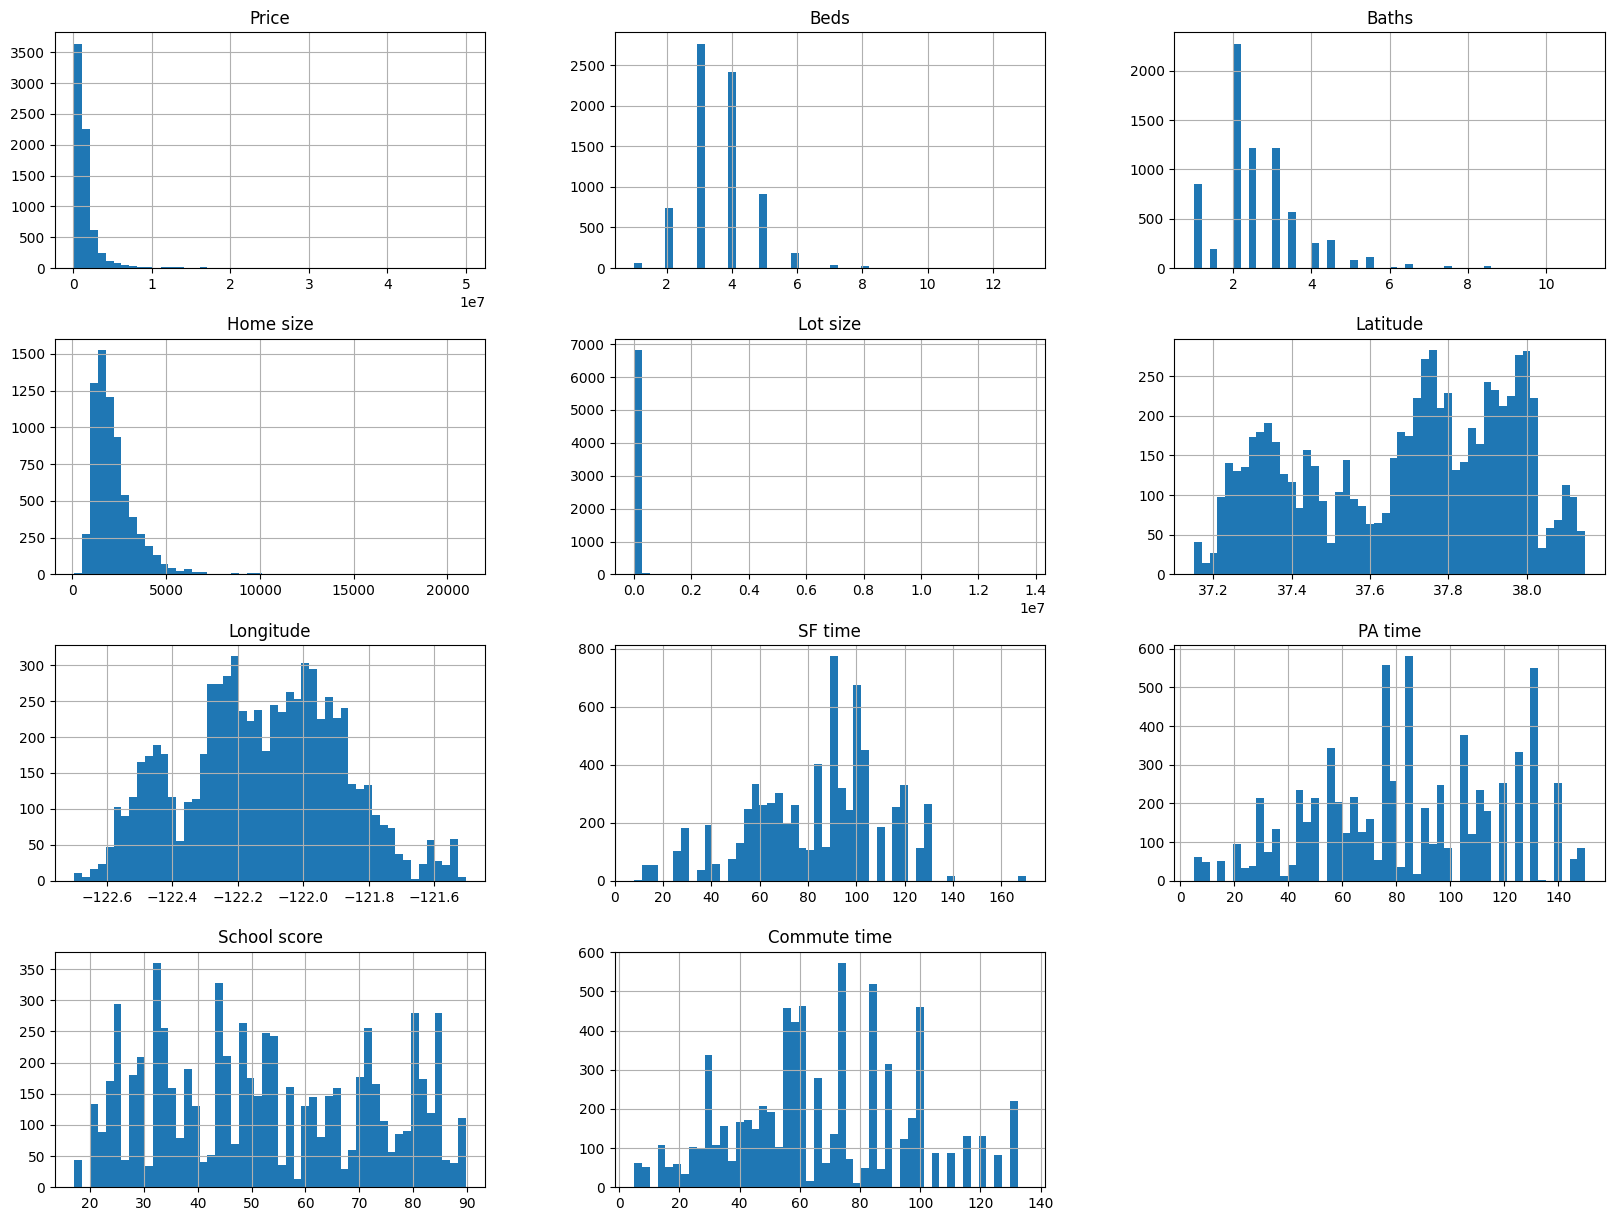

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=50, figsize=(20,15))
plt.show()

In [17]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df = df[ (df["Price"] < 3500000) & (df["Beds"] <= 10) & (df["Baths"] <= 9) & (df["Home size"] < 10000) & (df["Lot size"] < 20000)]
df = df.dropna(subset=["School score"])


In [18]:
import numpy as np

df["school_score_bucket"] = pd.cut(df["School score"],
                              bins=[17, 30, 45, 60, 75, np.inf],
                              labels=[1, 2, 3, 4, 5])

In [19]:
class_counts_by_group = df.groupby(['school_score_bucket', 'City']).size().reset_index(name='count')

valid_combinations = class_counts_by_group[class_counts_by_group['count'] >= 3]
valid_school_score_buckets = valid_combinations['school_score_bucket']
valid_cities = valid_combinations['City']

df_filtered = pd.merge(df, valid_combinations, on=['school_score_bucket', 'City'], how='inner')

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(df_filtered.drop(columns=['Price']), df_filtered['Price'],
                                                    test_size=0.2, stratify=df_filtered[['school_score_bucket', 'City']],
                                                    random_state=42)


In [21]:
X_train["City"].nunique()

93

In [22]:
X_test["City"].nunique()

93

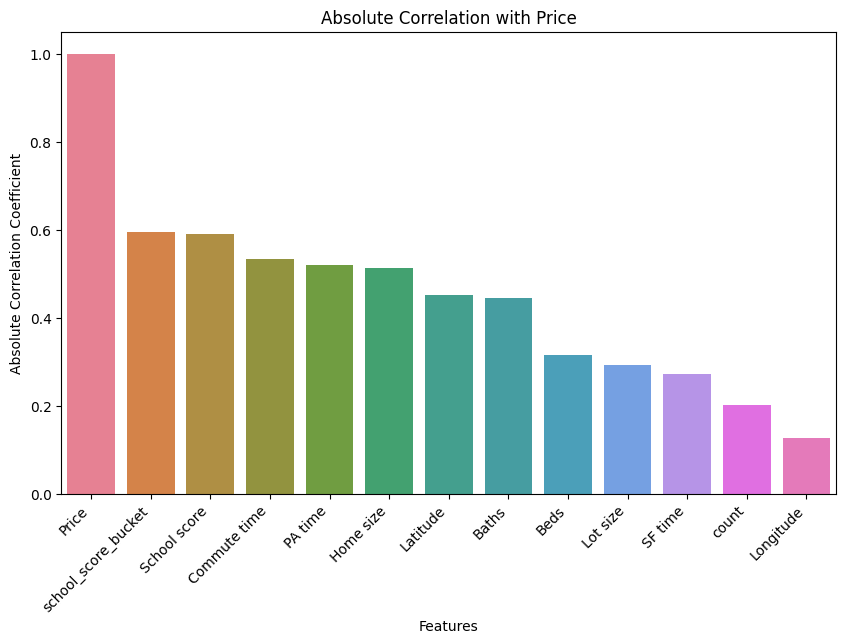

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_filtered and corr_matrix are defined
corr_matrix = df_filtered.drop("City", axis=1).corr()
abs_sorted_corr = corr_matrix["Price"].abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=abs_sorted_corr.index, y=abs_sorted_corr.values, hue=abs_sorted_corr.index, dodge=False)
plt.title("Absolute Correlation with Price")
plt.xlabel("Features")
plt.ylabel("Absolute Correlation Coefficient")
plt.xticks(rotation=45, ha="right")
plt.legend([], frameon=False)  # Hide legend since it's not necessary
plt.show()


In [24]:
import plotly.express as px


fig = px.scatter(df_filtered, x='Beds', y='Baths', size='Price', color='Price',
                 hover_data=['Price', 'Home size', 'Lot size', 'School score'],
                 title='Relationship between Beds, Baths, and Price',
                 labels={'Beds': 'Number of Bedrooms', 'Baths': 'Number of Bathrooms'})

fig.show()

This interactive scatter plot was really useful because it did confirm our suspicisons that more number of beds and baths doesn't automatically mean a higher price. From the plot we can see that the 8 bedroom houses are relatively cheap compared to some other two and three bedroom houses.

For the next plot, we wanted to get a better understanding of SF Time and Commute Time. We predicted that houses closer to the city and more urban areas would be more expected, but we wanted to see the difference between SF specifically, and Commute Time.

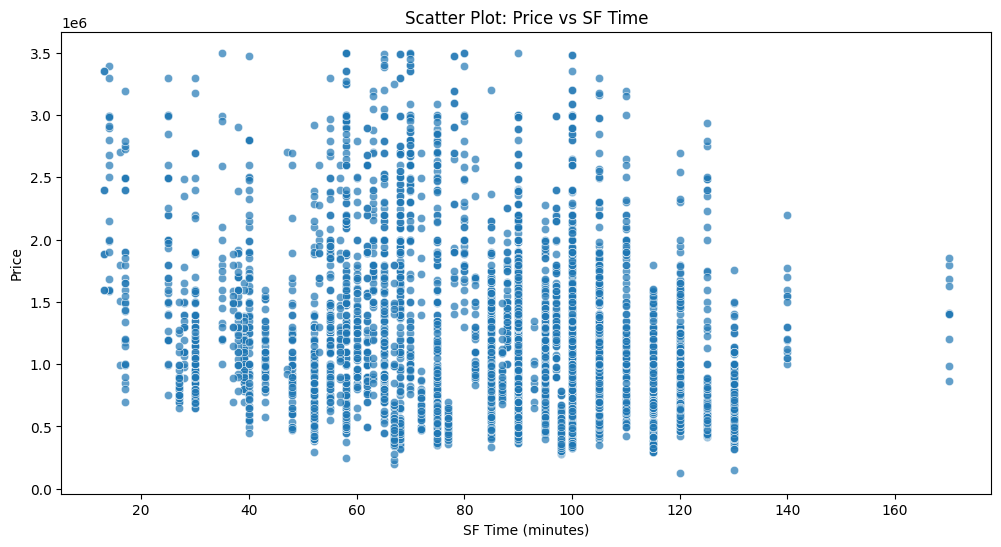

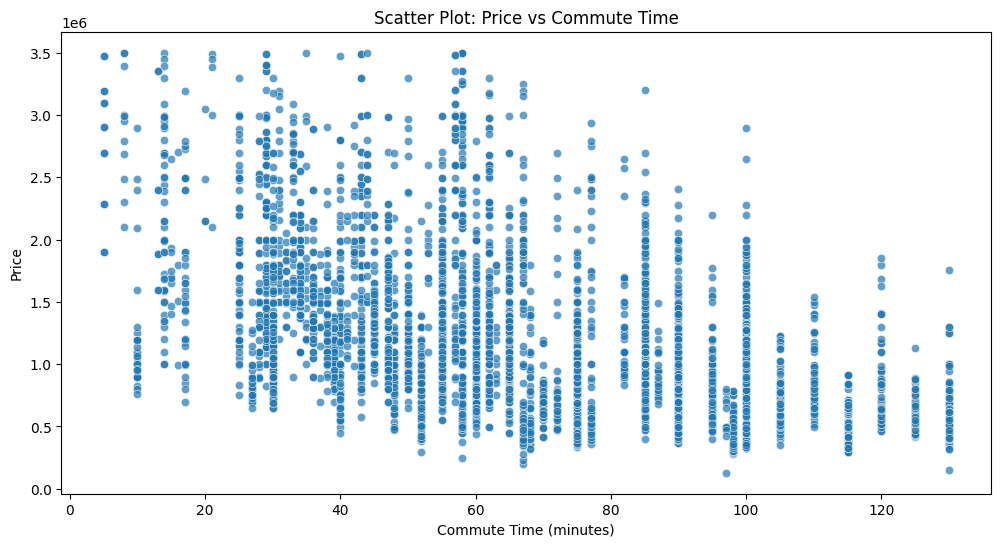

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'housing' is your DataFrame

# Scatter plot for Price vs SF time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='SF time', y='Price', alpha=0.7)
plt.title('Scatter Plot: Price vs SF Time')
plt.xlabel('SF Time (minutes)')
plt.ylabel('Price')
plt.show()

# Scatter plot for Price vs Commute time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_filtered, x='Commute time', y='Price', alpha=0.7)
plt.title('Scatter Plot: Price vs Commute Time')
plt.xlabel('Commute Time (minutes)')
plt.ylabel('Price')
plt.show()

After looking at the plots, the results are very similar. We will use commute time in the future.

In [26]:
X_train = X_train.drop(columns=['SF time'])
X_test = X_test.drop(columns=['SF time'])

In [27]:
import folium

average_values_price = df_filtered.groupby('City')["Price"].mean().reset_index()
average_values_price['Price Rank'] = average_values_price['Price'].rank()
merged_df = pd.merge(df_filtered, average_values_price, on='City', how='left')

map_center = [df['Latitude'].iloc[0], df['Longitude'].iloc[0]]
my_map = folium.Map(location=map_center, zoom_start=10)

for _, row in merged_df.drop_duplicates(subset='City').iterrows():
    city = row['City']
    lat, lon = row['Latitude'], row['Longitude']
    average_price = row['Price Rank']

    circle_size = average_price * 0.1

    circle_marker = folium.CircleMarker(
        location=[lat, lon],
        radius=circle_size,
        popup=f"{city}<br>Average Price: {average_price}",
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
    )

    circle_marker.add_to(my_map)

my_map


In [28]:
for set_ in (X_train, X_test):
    set_.drop("school_score_bucket", axis=1, inplace=True)

In [29]:
numeric_columns = X_train.select_dtypes(include=['int', 'float'])

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = X_train.select_dtypes(include=['int', 'float']).columns

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, numeric_features)
    ])

X_train_preprocessed = preprocessor.fit_transform(X_train)

X_train_preprocessed_df = pd.DataFrame(
    X_train_preprocessed,
    columns=numeric_features,
    index=X_train.index
)

X_train_preprocessed_df

,Beds,Baths,Home size,Lot size,Latitude,Longitude,PA time,School score,Commute time,count
2172,1.617,1.375,2.424,1.123,-0.199,1.450,0.746,0.121,1.432,-0.261
919,0.553,-0.380,0.833,-0.311,-0.994,-0.157,-2.397,1.601,-2.245,-0.950
2501,1.617,0.790,0.806,-0.428,1.082,1.628,1.943,-0.784,2.132,-0.342
3773,-0.512,-1.549,-0.845,-0.609,0.457,-0.732,0.237,-0.717,-0.739,0.983
4373,-0.512,-0.380,-1.159,0.929,0.757,-1.643,0.596,1.554,-0.389,-0.923
...,...,...,...,...,...,...,...,...,...,...
4934,-0.512,-0.380,0.282,0.914,-1.570,0.451,-1.230,1.798,-0.879,-0.990
727,-0.512,-1.549,-0.915,-1.464,0.092,-1.334,-0.601,-0.882,-1.370,1.064
1930,-0.512,-1.549,-1.126,-0.496,-0.150,0.035,-0.451,-1.364,0.031,0.361
3199,-1.576,-1.549,-1.165,-0.946,1.531,-0.521,1.195,-1.286,1.011,0.632


In [30]:
object_columns = X_train.select_dtypes(include='object')
df_encoded = pd.get_dummies(object_columns, columns=object_columns.select_dtypes(include='object').columns)
combined_df = pd.concat([X_train_preprocessed_df, df_encoded], axis=1)

In [31]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

X = combined_df
y = y_train

# Linear Regression
linear_reg = LinearRegression()
linear_reg_scores = cross_val_score(linear_reg, X, y, scoring='neg_mean_squared_error', cv=10)
linear_reg_rmse_scores = np.sqrt(-linear_reg_scores)
print("Linear Regression RMSE scores:", linear_reg_rmse_scores)
print("Linear Regression Mean RMSE:", linear_reg_rmse_scores.mean())



Linear Regression RMSE scores: [3.80094057e+15 2.18675458e+05 2.36828026e+05 2.54334562e+05
 2.52552835e+05 2.46455713e+05 2.32701893e+05 2.37647487e+05
 2.37367912e+05 2.30654696e+05]
Linear Regression Mean RMSE: 380094057636443.1


In [32]:
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_scores = cross_val_score(random_forest_reg, X, y, scoring='neg_mean_squared_error', cv=10)
random_forest_rmse_scores = np.sqrt(-random_forest_scores)
print("\nRandom Forest RMSE scores:", random_forest_rmse_scores)
print("Random Forest Mean RMSE:", random_forest_rmse_scores.mean())



Random Forest RMSE scores: [170028.80416664 169617.20600425 168566.70410167 204227.29351769
 186657.16090215 160089.52048494 172927.0452075  173962.7817106
 182801.88781331 179307.67374753]
Random Forest Mean RMSE: 176818.60776562826


In [33]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
decision_tree_scores = cross_val_score(decision_tree_reg, X, y, scoring='neg_mean_squared_error', cv=10)
decision_tree_rmse_scores = np.sqrt(-decision_tree_scores)
print("\nDecision Tree RMSE scores:", decision_tree_rmse_scores)
print("Decision Tree Mean RMSE:", decision_tree_rmse_scores.mean())


Decision Tree RMSE scores: [235496.25349015 240434.89950442 252864.32319892 274010.67856188
 255146.76673872 226452.98593843 242136.14246654 241086.98784474
 227885.37349318 238191.15608307]
Decision Tree Mean RMSE: 243370.55673200428


In [34]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor

knn_regressor = KNeighborsRegressor(n_neighbors=5)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn_regressor, X, y, scoring='neg_mean_squared_error', cv=kf)
cv_rmse_scores = np.sqrt(-cv_scores)
print("\nNeighbor Regressor RMSE scores:", cv_rmse_scores)
print(f"Mean RMSE: {cv_rmse_scores.mean()}")


Neighbor Regressor RMSE scores: [254276.32065712 248308.77760368 253797.37698281 224136.88391765
 228972.93805928 248178.99595875 203358.80947514 237163.88955473
 213916.67476685 226726.67162578]
Mean RMSE: 233883.7338601787


use random forrest regression

In [35]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define a smaller range for n_estimators
param_dist = {
    'n_estimators': randint(low=100, high=300),  # Reduce the range for n_estimators
    'max_depth': [None, 10, 20],                  # Reduce options for max_depth
    'min_samples_split': randint(low=2, high=8),  # Reduce the range for min_samples_split
    'min_samples_leaf': randint(low=1, high=4),   # Reduce the range for min_samples_leaf
    'max_features': [None, "sqrt", "log2"]        # Explicitly define max_features
}

# Create a Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

# Create the RandomizedSearchCV object with fewer iterations
random_search = RandomizedSearchCV(
    rf_reg,
    param_distributions=param_dist,
    n_iter=10,  # Decrease the number of iterations
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,  # Use all available cores for parallel computation
    random_state=42
)

# Fit the RandomizedSearchCV object to the full data
random_search.fit(X, y)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Access the best model from the search
best_rf_model = random_search.best_estimator_

# Evaluate the best model using cross-validation
best_rf_scores = cross_val_score(best_rf_model, X, y, scoring='neg_mean_squared_error', cv=10)
best_rf_rmse_scores = np.sqrt(-best_rf_scores)
print("\nBest Random Forest RMSE scores:", best_rf_rmse_scores)
print("Best Random Forest Mean RMSE:", best_rf_rmse_scores.mean())


Best Hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 231}

Best Random Forest RMSE scores: [171888.63568366 168327.63314329 168174.02100047 201810.27929433
 189575.43941226 161679.5278066  172957.83836553 175188.60102755
 181878.86673698 180578.64251754]
Best Random Forest Mean RMSE: 177205.94849882004


In [36]:
final_model = random_search.best_estimator_
numeric_columns_test = X_test.select_dtypes(include=['int', 'float'])
X_test_preprocessed = preprocessor.transform(X_test)
X_test_preprocessed_df = pd.DataFrame(
    X_test_preprocessed,
    columns=numeric_features,
    index=X_test.index
)
object_columns_test = X_test.select_dtypes(include='object')
df_encoded_test = pd.get_dummies(object_columns_test, columns=object_columns_test.select_dtypes(include='object').columns)
combined_df_test = pd.concat([X_test_preprocessed_df, df_encoded_test], axis=1)



In [37]:
from sklearn.metrics import mean_squared_error

final_predictions = final_model.predict(combined_df_test)

final_mse = mean_squared_error(y_test, final_predictions)
print(f'Mean Squared Error on Test Set: {final_mse}')

Mean Squared Error on Test Set: 34163702928.685688
